# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


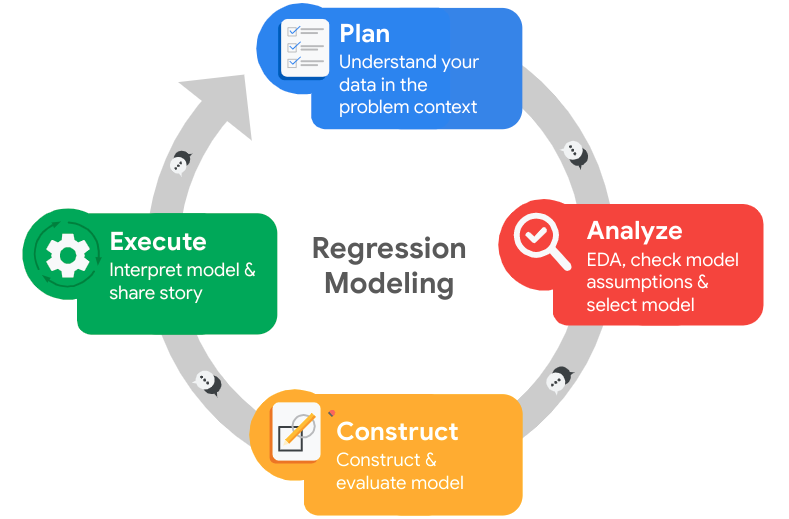

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This module lets us save our models once we fit them.
import pickle

# The will let us set the n_jobs parameter to a higher number in GridSearchCV to help improve processing times 
import os

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'satisfaction_level': 'sat_level', 
                    'last_evaluation' : 'last_eval', 
                    'average_montly_hours':'avg_monthly_hours',
                    'time_spend_company' : 'tenure',
                    'Work_accident' : 'work_accident',
                    'promotion_last_5years' : 'promotion_last_5y',
                    'Department': 'department'})


# Display all column names after the update
df0.columns

Index(['sat_level', 'last_eval', 'number_project', 'avg_monthly_hours',
       'tenure', 'work_accident', 'left', 'promotion_last_5y', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isnull().sum()

sat_level            0
last_eval            0
number_project       0
avg_monthly_hours    0
tenure               0
work_accident        0
left                 0
promotion_last_5y    0
department           0
salary               0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated() == True].head()

,sat_level,last_eval,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Calculate the percentage of data that would be dropped if duplicates were dropped, assuming that
# there are about 2 duplicates for each duplicate
((df0.duplicated().sum()/2) / df0.shape[0])*100

10.027335155677045

In [12]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,sat_level,last_eval,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5y,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

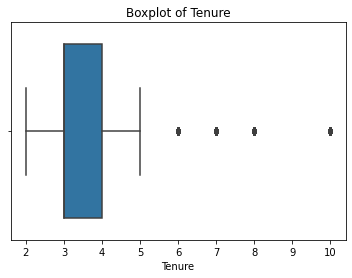

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = sns.boxplot(x=df1['tenure'])
fig.set_xlabel('Tenure')
plt.title('Boxplot of Tenure')

plt.show()

In [14]:
# Determine the number of rows containing outliers
# It appears that the upper bound is about 5 so values above this can be considered outliers. 
df1[df1['tenure'] > 5].shape[0]

824

We will leave the outliers for this variable in the dataset. Employees with a tenure of greater than 5 years up to 10 years is not impossible. Additionally, for this analysis we will use an XGBoost which generally handles outliers well.

### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
 - The stakeholders for this project are the HR team at Sailfort.
- What are you trying to solve or accomplish?
 - I am trying to help the HR team understand the reasons for employee churn and to predict potential employee attrition.
- What are your initial observations when you explore the data?
 - There aren't any missing values which is great!
 - The column names are inconsitent, so I'll clean those up
 - Duplicate rows were dropped because we don't currently have a way of knowing if these represent the same employee mutliple times or if they are truly unique. 
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
 - https://seaborn.pydata.org/generated/seaborn.boxplot.html
 - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
- Do you have any ethical considerations in this stage?
    - Since the data does not include employee IDs or other personally identifiable information (PII), I believe there is sufficient anonymity to use this data responsibly.
    - I’d like to confirm that the model will be used to develop resources aimed at improving employee satisfaction and retention, rather than as a tool for preemptively terminating employees flagged as more likely to leave.
    - I’d also like to verify with the HR team whether survey participants were informed that their data would be used to build a model for understanding employee turnover.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
# Re-scale 'sat_level' and 'last_eval' from 0-1 to 0-100 to improve interpretability 
# Transform sat_level into 100 
df1['sat_level'] = df1['sat_level'] * 100

# Transform last_eval into 100 
df1['last_eval'] = df1['last_eval'] * 100

In [17]:
# Define a function to create histograms
def make_default_histplot(column, full_attribute_name):
    plt.hist(df1[f'{column}'])
    plt.title(f'Histogram of {full_attribute_name}')
    plt.xlabel(f'{full_attribute_name}')
    plt.show()

In [18]:
# Define a function to create bar charts
def make_default_barchart(column, full_attribute_name):
    value_counts = df1[f'{column}'].value_counts()

    plt.figure(figsize=(5,5))
    plt.bar(x=value_counts.index,height=value_counts.values)
    plt.xticks(value_counts.index)
    plt.title(f'Bar Chart of {full_attribute_name}')
    plt.xlabel(f'{full_attribute_name}')
    plt.ylabel('Counts')
    if len(value_counts.index) >= 8:
        plt.xticks(rotation=90)
        
    plt.show()
    
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = [f'{column}', 'Count']
    print(value_counts_df.to_string(index=False))

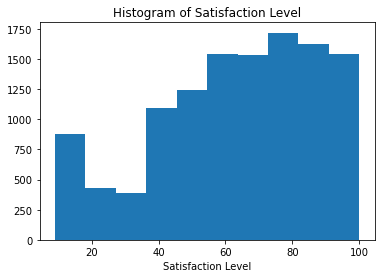

In [19]:
# Create a histplot of sat_level
make_default_histplot('sat_level', 'Satisfaction Level')

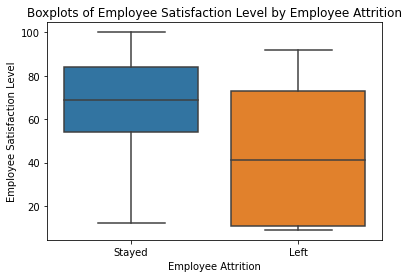

In [20]:
# Create a boxplot to show the distribution of statisfaction by employee attrition (left)
sns.boxplot(x='left',y='sat_level', data=df1)
plt.xlabel('Employee Attrition')
plt.ylabel('Employee Satisfaction Level')
plt.xticks(ticks=[0,1], labels=['Stayed','Left'])
plt.title('Boxplots of Employee Satisfaction Level by Employee Attrition')
plt.show()

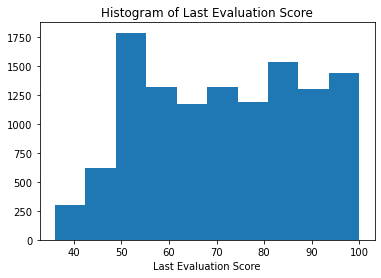

In [21]:
# Create a histogram of last_eval
make_default_histplot('last_eval', 'Last Evaluation Score')

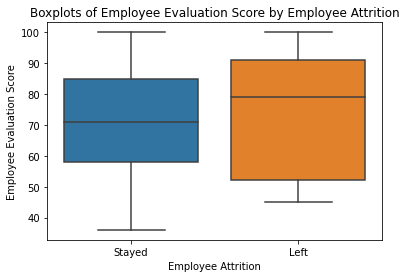

In [22]:
# Create a boxplot to show the distribution of last evaluation by employee attrition (left)
sns.boxplot(x='left',y='last_eval', data=df1)
plt.xlabel('Employee Attrition')
plt.ylabel('Employee Evaluation Score')
plt.xticks(ticks=[0,1], labels=['Stayed','Left'])
plt.title('Boxplots of Employee Evaluation Score by Employee Attrition')
plt.show()

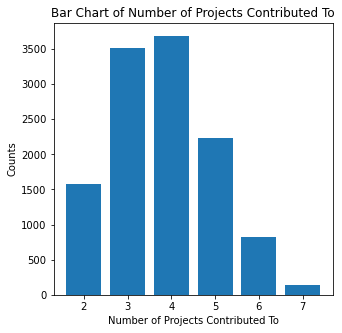

 number_project  Count
              4   3685
              3   3520
              5   2233
              2   1582
              6    826
              7    145


In [23]:
# Create a bar chart of number_project
make_default_barchart('number_project', "Number of Projects Contributed To")

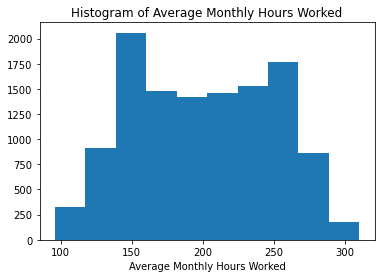

In [23]:
# Create a histogram of avg_monthly_hours
make_default_histplot('avg_monthly_hours', 'Average Monthly Hours Worked')

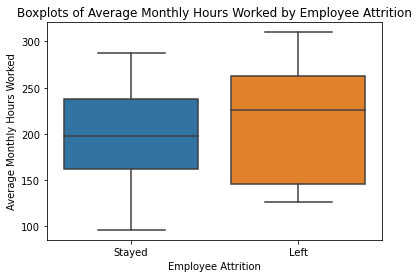

In [24]:
# Create a boxplot to show the distribution of statisfaction by employee attrition (left)
sns.boxplot(x='left',y='avg_monthly_hours', data=df1)
plt.xlabel('Employee Attrition')
plt.ylabel('Average Monthly Hours Worked')
plt.xticks(ticks=[0,1], labels=['Stayed','Left'])
plt.title('Boxplots of Average Monthly Hours Worked by Employee Attrition')
plt.show()

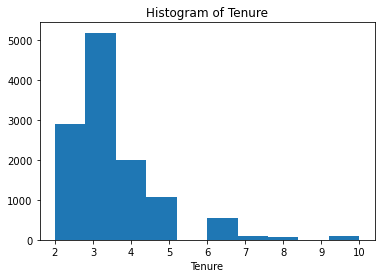

In [25]:
# Create a histogram of tenure
make_default_histplot('tenure', 'Tenure')

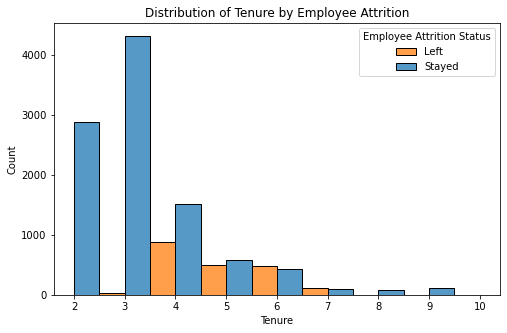

In [26]:
# Create a historgram that shows the distribution of tenure vs employee attrition (left)
plt.figure(figsize=(8, 5))
sns.histplot(data=df1, 
             x='tenure', 
             hue='left', 
             binwidth = 1,
             multiple = 'dodge')
plt.xlabel('Tenure')
plt.legend(title='Employee Attrition Status',labels=['Left','Stayed'])
plt.title('Distribution of Tenure by Employee Attrition')
plt.show()

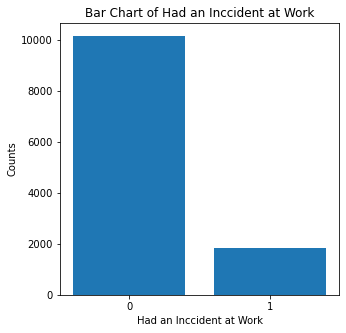

 work_accident  Count
             0  10141
             1   1850


In [27]:
# Create a bar chart of 'work_accident'
make_default_barchart('work_accident', "Had an Inccident at Work")

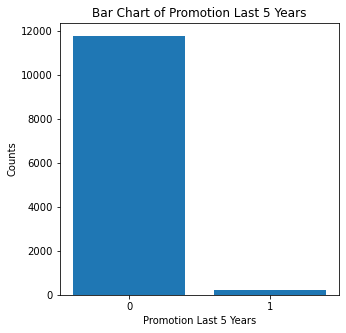

 promotion_last_5y  Count
                 0  11788
                 1    203


In [28]:
# Create a bar chart of 'promotion_last_5y'
make_default_barchart('promotion_last_5y', "Promotion Last 5 Years")

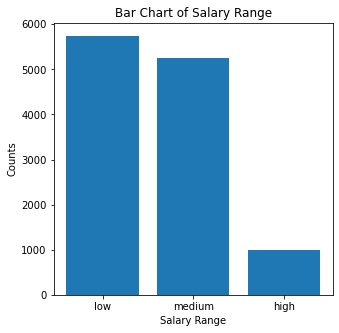

salary  Count
   low   5740
medium   5261
  high    990


In [29]:
# Create a bar chart of 'salary'
make_default_barchart('salary', "Salary Range")

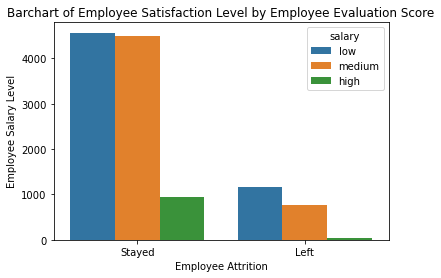

In [25]:
# Create a bar chart to show the distribution of salary by employee attrition (left)
sns.countplot(x='left', hue='salary', data=df1)
plt.xlabel('Employee Attrition')
plt.ylabel('Employee Salary Level')
plt.xticks(ticks=[0,1], labels=['Stayed','Left'])
plt.title('Barchart of Employee Satisfaction Level by Employee Evaluation Score')
plt.show()

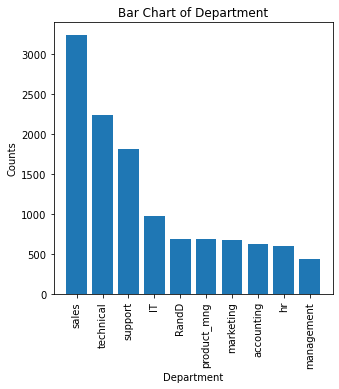

 department  Count
      sales   3239
  technical   2244
    support   1821
         IT    976
      RandD    694
product_mng    686
  marketing    673
 accounting    621
         hr    601
 management    436


In [31]:
# Create a bar chart of 'department'
make_default_barchart('department', "Department")

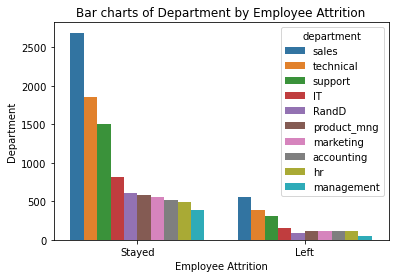

In [26]:
# Create a bar chart to show the distribution of department by employee attrition (left)
# Order department by total counts
dep_order = (
    df1.groupby('department')['left']
    .count()
    .sort_values(ascending=False)
    .index
)

sns.countplot(x='left', hue='department', data=df1, order=[0,1],hue_order=dep_order)
plt.xlabel('Employee Attrition')
plt.ylabel('Department')
plt.xticks(ticks=[0,1], labels=['Stayed','Left'])
plt.title('Bar charts of Department by Employee Attrition')
plt.show()

### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
    - There is a notable imbalance in the data: 83% of employees stayed, while only 17% left.
    - The salary range distribution for employees who stayed and left closely matches the overall sample distribution, suggesting compensation might not be a strong predictor of churn.
    - Similarly, the department distribution for both groups mirrors the overall sample, indicating that department may not be a significant factor in predicting churn.
- What do you observe about the distributions in the data?
    - Satisfaction Scores: The scores are right-skewed, indicating that employees are generally more satisfied.
    - Last Evaluation Scores: These are unimodal, with no values below ~0.35.
    - Number of Projects Contributed To: Most employees are contributing to 3–4 projects.
    - Average Monthly Hours Worked: The number of hours worked follows a bell curve. A 40-hour work week equates to 160 hours monthly, but the median is closer to 200 hours, suggesting that more than half of the employees are working overtime.
        - Could this indicate the need for additional staffing or resources to prevent burnout?
        - Are there seasonal trends driving higher labor demand, and could Salifort implement measures to alleviate these spikes?
    - Tenure: Employee tenure is left-skewed, with a noticeable increase in turnover after year 3.
        - I’d like to verify with the HR team if this aligns with their knowledge of tenure, ensuring employees with shorter tenures aren’t overrepresented.
        - Assuming the data is accurate, what might be causing this larger exodus after three years?
    - Had a Workplace Incident: About 15% of employees in the dataset experienced an incident at work.
    - Promotion Last 5 Years: Only 1% of employees received a promotion in the last five years.
        - This is another data point I’d like to confirm with HR to ensure that employees with promotions aren’t underrepresented.
- What transformations did you make with your data? Why did you chose to make those decisions?
    - The variables sat_level and last_eval were rescaled from a 0–1 range to a 0–100 range to improve interpretability.
- What are some purposes of EDA before constructing a predictive model?
    - Gaining a deeper understanding of the data and its context.
    - Visualizing relationships between features and the target variable to identify potential predictors.
    - Identifying attributes that may require cleaning or transformation and determine the need for feature engineering.
    - Evaluating assumptions that can be made about the data to inform model selection and preprocessing.
    - Detecting patterns, trends, or anomalies in the data that could influence model performance
    - Assessing the balance of classes to determine if resampling techniques might be necessary.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
    - https://seaborn.pydata.org/generated/seaborn.histplot.html
    - https://seaborn.pydata.org/generated/seaborn.countplot.html
- Do you have any ethical considerations in this stage?
    - I would consult with HR to ensure that the data on employee tenure, promotions, salary range, and department aligns with their understanding of the company as a whole. This step is essential to confirm that the dataset is representative and free from potential biases.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task involves classifying whether an employee is likely to leave the company or remain employed.

### Identify the types of models most appropriate for this task.

Both logistic regression and tree-based models, such as decision trees, random forests, or gradient boosting, are well-suited for this classification task. Given that there is a large sample size still remaining after data cleaning and there are no missing values we will use the decision tree based model XGBoost.

## Recall model assumptions

**XGBoost classifier assumptions**
- Outcome variable can be categorical or continuous.
- Observations should be independent of each other.
- Features should have minimal multicollinearity.
- Outliers are generally handled well but should be monitored.
- No strict assumption of a linear relationship.
- Sufficiently large sample size.
- Features should contain minimal missing values.

### Modeling

- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions

In [33]:
# One hot encode salary and department
df2 = pd.get_dummies(df1, columns=['salary', 'department'], drop_first=False)

In [34]:
# Subset X variable
X = df2.drop(columns=['left'])
y = df2['left']

In [35]:
# Split the data into train, test, and validation sets
# Split into train and test sets
X_tr, X_test, y_tr, y_test, = train_test_split(X, y, 
                                               test_size=.2, 
                                               random_state=42,
                                               stratify=y)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, 
                                               test_size=.25, 
                                               random_state=42,
                                               stratify=y_tr)

#### XGBoost Model

F1-score was choosen as the main evaluation metric for this model because of the imbalance in the target variable.

In [27]:
# Instantiate the XGBoost model
# objective='binary:logistic': Specifies the binary classification task with logistic regression
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 

# Define the Cross Validation parameters
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

# Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1', verbose=3, n_jobs=os.cpu_count() - 1)

In [37]:
%%time
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=31)]: Using backend LokyBackend with 31 concurrent workers.
[Parallel(n_jobs=31)]: Done  66 tasks      | elapsed:   48.9s
[Parallel(n_jobs=31)]: Done 226 tasks      | elapsed:  2.2min
[Parallel(n_jobs=31)]: Done 450 tasks      | elapsed:  4.3min
[Parallel(n_jobs=31)]: Done 738 tasks      | elapsed:  7.1min
[Parallel(n_jobs=31)]: Done 1125 out of 1125 | elapsed: 10.5min finished


CPU times: user 8min 41s, sys: 1.01 s, total: 8min 42s
Wall time: 14min 45s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

#### Optional
Pickle the model to save your work if you need to pause and return to the notebook.

In [38]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work'

In [39]:
# Pickle the model
with open(path+'xgb_cv.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [40]:
# Read in pickled model
with open(path + 'xgb_cv.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

### Evaluate the model
- Review the scores
- Review the most important metrics
- Review the model's scoring on the validation set

In [41]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1 score': [f1],
                          'Accuracy score': [accuracy],
                          'Recall score': [recall],
                          'Precision score': [precision]
                         }
                        )
  
    return table

In [42]:
# Display the best score to understand the performance of the best score, in this case f1
xgb_cv.best_score_

0.9442003268511087

In [43]:
# Create xgb model results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1 score,Accuracy score,Recall score,Precision score
0,XGBoost CV,0.9442,0.982207,0.909623,0.982225


In [44]:
# Display the optimal parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100}

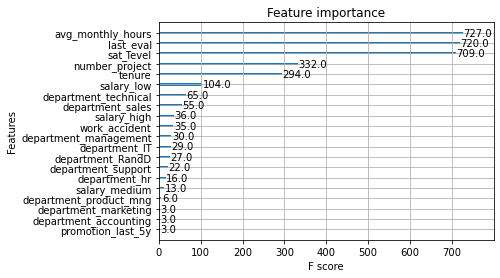

In [45]:
# Plot the importance of the independent variables
plot_importance(xgb_cv.best_estimator_)

#### Review the model's scoring on the validation set

In [46]:
# Use XGBoost model to predict on validation data
y_pred = xgb_cv.predict(X_val)

In [47]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'F1 score': [f1],
                          'Accuracy score': [accuracy],
                          'Recall score': [recall],
                          'Precision score': [precision]
                          })
    
    return table

In [48]:
# Get validation scores for RF model
xgb_val_scores = get_test_scores('XGBoost val', y_pred, y_val)

# Append to the results table
results = pd.concat([xgb_val_scores,xgb_cv_results], axis=0)
results

,Model,F1 score,Accuracy score,Recall score,Precision score
0,XGBoost val,0.954604,0.985405,0.924623,0.986595
0,XGBoost CV,0.944200,0.982207,0.909623,0.982225


The scores are similiar between the model evaluated on the train and validation datasets, which indicats that the model did not overfit the training data.

### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
    - No, I did not notice anything unusual.
- Which independent variables did you choose for the model and why?
    - I initially included all the independent variables in the model to allow XGBoost to evaluate their significance. XGBoost is robust to irrelevant features due to its built-in feature selection process, which assigns importance scores to variables based on their contribution to reducing the loss. If certain features consistently show low importance or negatively impact performance, I consider removing them in subsequent iterations to improve model efficiency and interpretability.
- Are each of the assumptions met?
    - Yes, all of the model’s assumptions are met.
- How well does your model fit the data?
    - The model fits the data very well and performs strongly on the holdout test data. This indicates that the model is not overfitting and generalizes effectively to unseen data.
- Can you improve it? Is there anything you would change about the model?
    - While the model's performance is already strong, there may be opportunities for further improvement through hyperparameter tuning or by removing independent variables with consistently low importance. These adjustments could enhance both efficiency and interpretability.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - XGBoost Documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html
- Do you have any ethical considerations at this stage?
    - At this stage, I do not have any ethical considerations.



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [49]:
# Use XGBoost model to predict on test data
y_preds = xgb_cv.predict(X_test)

# Get test scores for XGBoost model
champ_val_scores = get_test_scores('XGB Champ', y_preds, y_test)

# Append to the results table
results = pd.concat([results, champ_val_scores], axis = 0)

In [50]:
results

,Model,F1 score,Accuracy score,Recall score,Precision score
0,XGBoost val,0.954604,0.985405,0.924623,0.986595
0,XGBoost CV,0.944200,0.982207,0.909623,0.982225
0,XGB Champ,0.953608,0.984994,0.929648,0.978836


There are no notable discrepancies between the model's performance on the training, validation, and test datasets. 

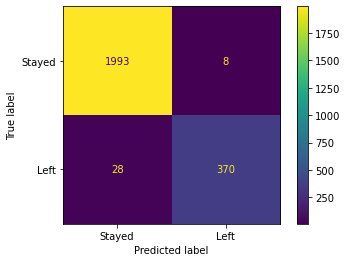

In [55]:
# Plot a confusion matrix to further evaluate the model's performance
# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_preds, labels = xgb_cv.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Stayed','Left'])

# Display the confusion matrix
disp.plot(values_format='d') # 'd' for integers

### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
    - The independent variables average monthly hours worked, last evaluation score, and satisfaction score had the highest levels of feature importance, while department and promotion in the last 5 years had very little importance. 
- What business recommendations do you propose based on the models built?
    - There are 3 key recommendations based on the model that HR can focus on Staffing and Workload Management, Employee Satisfaction, and High Risk Groups
        - The model highlights the importance of ensuring departments are adequately staffed to align with timeline commitments and avoid prolonged overtime for employees. Overworked employees are likely contributing to low satisfaction scores, which the model identifies as a key predictor of churn.
        - Employees with low satisfaction scores should be prioritized for engagement and support. Addressing their concerns directly could significantly reduce churn rates.
        - Special attention should be given to employees who exhibit a combination of low satisfaction and either extremely low or high evaluation scores. The model suggests that these attributes may serve as strong indicators of potential churn.
- What potential recommendations would you make to your manager/company?
    - To prevent burnout and proactively address employee concerns, the company should implement regular capacity assessments to align project timelines with team capabilities. Introducing real-time feedback systems would enable quicker identification of employee dissatisfaction and more agile responses. Targeted retention initiatives for high-risk employees, especially those with low satisfaction or extreme evaluation scores, could mitigate turnover. Additionally, analyzing long-term trends would help identify and address systemic issues contributing to dissatisfaction and churn.
- Do you think your model could be improved? Why or why not? How?
    - Yes, the model could be improved by incorporating additional data related to employee concerns. Specifically, information about workload, overtime hours, and detailed feedback from satisfaction surveys could provide deeper insights into the factors driving dissatisfaction and churn. These variables would complement existing data, such as evaluation scores and satisfaction levels, enabling the model to capture a more comprehensive picture and improving its predictive accuracy.
- Given what you know about the data and the models you were using, what other questions could you address for the team?
    - We could start by reaching out to employees with varying satisfaction scores to gain insights into their perspectives on company challenges. This would help management and the HR team identify weak points in the employee experience and develop targeted plans to address these concerns. 
    - Reviewing historical data could give us further insights on both. 
        - Employee satisfaction trends over time could reveal how past initiatives have influenced satisfaction levels, providing guidance for future improvements. 
        - Early warning signs of potential turnover among high-performing employees—such as correlations between the number of projects, overtime hours, and resignation timing—could enable proactive strategies to retain top talent.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    - Confustion Matrix Docuementation: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html
- Do you have any ethical considerations in this stage?
    - At this stage, I do not have any ethical considerations

### Summary of model results

#### Objective
The goal of the XGBoost model was to predict employee turnover based on features in the dataset gathered by HR.

#### Data Overview
The dataset provided by the HR team included 10 columns and 14,999 rows. The target variable was left. Data processing included removing rows that were complete duplicates, one-hot encoding the department and salary categorical variables, and scaling the satisfaction score and evaluation score metrics by 100.

#### Model Configuration
Cross-validation with 5 folds was used to validate the model’s performance and determine the best hyperparameters. After this, the model was trained using the following hyperparameters: a learning rate of 0.1, a max depth of 8, a minimum child weight of 1, and 100 estimators.

#### Performance Metrics
We chose to use the F1 score as the main evaluation metric for this model because of the imbalance in the target variable. On the training dataset, the model achieved an F1 score of 0.9442. On the validation dataset, the model achieved an F1 score of 0.9546. Finally, on the test dataset, the model achieved an F1 score of 0.9536. Utilizing both a validation and test set helps to ensure that the model performs well on unseen data.

#### Feature Importance
The top three most important features were average monthly hours worked, last employee evaluation score, and employee satisfaction score. Each of these was used approximately twice as much as the other variables as predictors for splitting the data in the XGBoost model, indicating that these variables were extremely important in the model’s decision-making process.

#### Strengths and Weaknesses
The model demonstrated strong generalization with minimal overfitting, as indicated by comparable training, validation, and test performance metrics. To continue to strengthen this model, additional data on employee workload, such as the total number of hours worked in a year, could be beneficial.

### Conclusion, Recommendations, Next Steps

#### Conclusion
The XGBoost model accurately predicted employee turnover, with strong performance across training, validation, and test datasets. The key factors driving predictions were average monthly hours worked, the most recent employee evaluation score, and satisfaction score. These features proved crucial in understanding turnover risk, and the model showed minimal overfitting. Overall, the results offer valuable insights into the main drivers of employee retention. 

#### Recommendations for the Team
Based on the results of this model, we recommend focusing retention efforts on employees who have a high average number of hours worked, evaluation scores above 80 (or 0.8), and employee satisfaction scores below 70 (or 0.7).

Outlined below are potential actions the HR team could take: 
1. Develop Retention Strategies: Work on a plan to retain employees who are flagged as high-risk.
2. Optimize Staffing and Workload Management: Implement capacity planning strategies to address workload issues, as excessive hours worked is a significant predictor of churn. Ensure project timelines align with team capabilities.
3. Proactive Monitoring: Create a system for real-time tracking of key metrics, such as average hours worked, so that HR and management can be alerted to any high churn-risk employees.

#### Next Steps for Continued Analysis
Next steps for the analytics team include:
1. Expand Data Collection: Gather additional data, such as total hours worked annually, employee feedback on workload, and reasons for past resignations, to further refine the model and improve prediction accuracy.
2. Refine the Model: Perform additional hyperparameter tuning to enhance performance further.
3. Business Integration: Collaborate with HR and management to implement a dashboard that monitors high-risk employees identified by the model and tracks satisfaction trends over time.
4. Evaluate Interventions: Use historical data to assess the impact of past retention initiatives and develop targeted programs to address key issues identified in the data.